## Results from GW190521 analysis
Here, we plot the results from our simulations. We first extract the data from the pickle files. Then we make plots showing the range of values the properties could take place for all the AGNs as a function of the distance from the center of the AGN. The highlighted line in each plot are the results obtained when considering the AGN J124942.3+344929.

In [1]:
from EM_CP_class import AGN_model, EM_model
import pagn.constants as ct

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

import numpy as np
import matplotlib.pyplot as plt

import pickle

import matplotlib as mpl

In [2]:
with open('/Users/jhuma/Lahar_work/multimessenger_project/data_store/AGN_disk_data/AGN_mod_store.pkl', 'rb') as f:
    data_agn_disk = pickle.load(f)

In [3]:
"""
We store the data for AGN J124942.3+344929 as our main candidate. We interpolate the AGN disk properties of all other AGNs
to the R values of this particular AGN. We then find the max and min value for each property at every R value.
We also find the values at the 5th and 95th percentile for each property.
"""
data_agn_keys = np.asarray(list(data_agn_disk.keys()))

main_tho = data_agn_disk[438660].tho
main_r = main_tho.R

rho_stack = []
h_stack = []

for key in data_agn_keys:
    tho = data_agn_disk[key].tho
    R = tho.R

    rho_stack.append(np.interp(main_r, R, tho.rho))
    h_stack.append(np.interp(main_r, R, tho.h))

rho_stack = np.array(rho_stack)
h_stack = np.array(h_stack)

rho_min, rho_max = np.nanmin(rho_stack, axis=0), np.nanmax(rho_stack, axis=0)
h_min, h_max = np.nanmin(h_stack, axis=0), np.nanmax(h_stack, axis=0)

rho_lo, rho_hi = np.nanpercentile(rho_stack, [5, 95], axis=0)
h_lo, h_hi = np.nanpercentile(h_stack, [5, 95], axis=0)

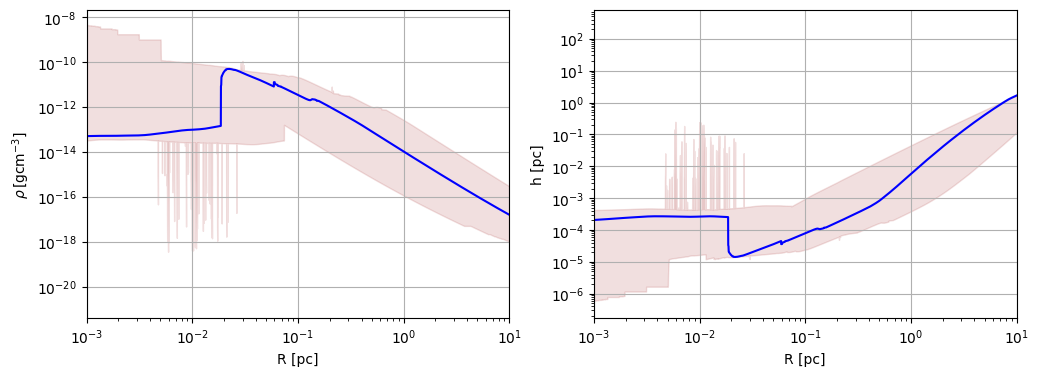

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(main_r/ct.pc, main_tho.rho*ct.SI_to_gcm3, '-', color='blue')
ax[0].fill_between(main_r/ct.pc, rho_min*ct.SI_to_gcm3, rho_max*ct.SI_to_gcm3, color=mpl.colors.to_rgba('brown', 0.15))
ax[0].set_xscale('log')
ax[0].set_yscale('log')

ax[0].set_xlim([1e-3, 10])
ax[0].grid(True)
#ax.axvspan(22, 27.5, color='blue', alpha=0.1)
#ax.legend()
ax[0].set_xlabel(r"R [pc]", fontsize=10)
ax[0].set_ylabel(r"$\rho \, [\mathrm{g cm^{-3}}]$", fontsize=10)

ax[1].plot(main_r/ct.pc, main_tho.h/ct.pc, '-', color='blue')
ax[1].fill_between(main_r/ct.pc, h_min/ct.pc, h_max/ct.pc, color=mpl.colors.to_rgba('brown', 0.15))
ax[1].set_xscale('log')
ax[1].set_yscale('log')

ax[1].set_xlim([1e-3, 10])
ax[1].grid(True)
#ax.axvspan(22, 27.5, color='blue', alpha=0.1)
#ax.legend()
ax[1].set_xlabel(r"R [pc]", fontsize=10)
ax[1].set_ylabel(r"h [pc]", fontsize=10)
plt.savefig("AGN_disk_plots_min_max.jpg", format="jpg")
plt.show()

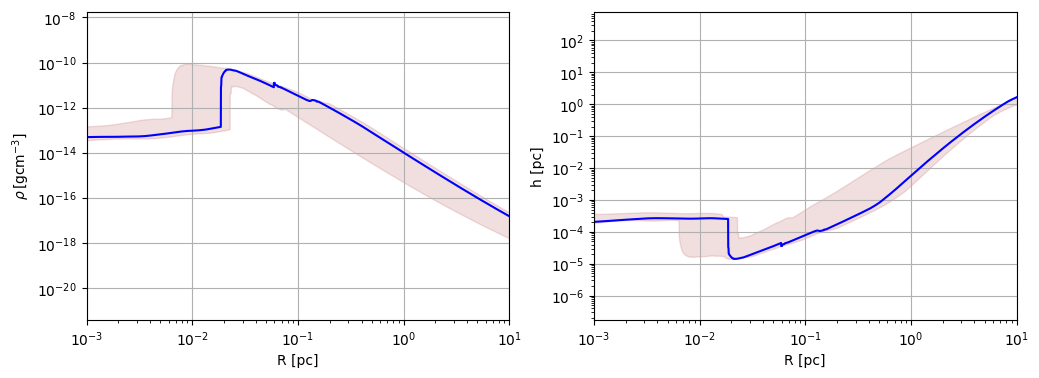

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(main_r/ct.pc, main_tho.rho*ct.SI_to_gcm3, '-', color='blue')
ax[0].fill_between(main_r/ct.pc, rho_hi*ct.SI_to_gcm3, rho_lo*ct.SI_to_gcm3, color=mpl.colors.to_rgba('brown', 0.15))
ax[0].set_xscale('log')
ax[0].set_yscale('log')

ax[0].set_xlim([1e-3, 10])
ax[0].grid(True)
#ax.axvspan(22, 27.5, color='blue', alpha=0.1)
#ax.legend()
ax[0].set_xlabel(r"R [pc]", fontsize=10)
ax[0].set_ylabel(r"$\rho \, [\mathrm{g cm^{-3}}]$", fontsize=10)

ax[1].plot(main_r/ct.pc, main_tho.h/ct.pc, '-', color='blue')
ax[1].fill_between(main_r/ct.pc, h_hi/ct.pc, h_lo/ct.pc, color=mpl.colors.to_rgba('brown', 0.15))
ax[1].set_xscale('log')
ax[1].set_yscale('log')

ax[1].set_xlim([1e-3, 10])
ax[1].grid(True)
#ax.axvspan(22, 27.5, color='blue', alpha=0.1)
#ax.legend()
ax[1].set_xlabel(r"R [pc]", fontsize=10)
ax[1].set_ylabel(r"h [pc]", fontsize=10)
plt.savefig("AGN_disk_plots_lo_hi.jpg", format="jpg")
plt.show()

In [10]:
with open('/Users/jhuma/Lahar_work/multimessenger_project/data_store/AGN_disk_data/GW_EM_prop_store.pkl', 'rb') as f:
    data_em_prop = pickle.load(f)

In [14]:
"""
We do the same thing we did for the AGN disk properties to the EM couterpart properties.
"""
data_em_prop_keys = np.asarray(list(data_em_prop.keys()))

t_delay_stack = []
t_duration_stack = []

L_sh_stack = []
L_j_stack = []

T_breakout_stack = []

beta_stack = []
beta_gamma_stack = []
gamma_stack = []

for key in data_em_prop:
    tho = data_agn_disk[key].tho
    em_props = data_em_prop[key]
    R = tho.R

    t_delay_stack.append(np.interp(main_r, R, em_props.t_delay_vals))
    t_duration_stack.append(np.interp(main_r, R, em_props.t_duration_vals))

    L_sh_stack.append(np.interp(main_r, R, em_props.L_sh_vals))
    L_j_stack.append(np.interp(main_r, R, em_props.L_j_vals))

    T_breakout_stack.append(np.interp(main_r, R, em_props.T_breakout_vals))

    beta_stack.append(np.interp(main_r, R, em_props.beta_vals))
    beta_gamma_stack.append(np.interp(main_r, R, em_props.beta_gamma_vals))
    gamma_stack.append(np.interp(main_r, R, em_props.gamma_vals))

t_delay_stack = np.array(t_delay_stack)
t_duration_stack = np.array(t_duration_stack)

L_sh_stack = np.array(L_sh_stack)
L_j_stack = np.array(L_j_stack)

T_breakout_stack = np.array(T_breakout_stack)

beta_stack = np.array(beta_stack)
beta_gamma_stack = np.array(beta_gamma_stack)
gamma_stack = np.array(gamma_stack)

t_delay_min, t_delay_max = np.nanmin(t_delay_stack, axis=0), np.nanmax(t_delay_stack, axis=0)
t_duration_min, t_duration_max = np.nanmin(t_duration_stack, axis=0), np.nanmax(t_duration_stack, axis=0)

t_delay_lo, t_delay_hi = np.nanpercentile(t_delay_stack, [5, 95], axis=0)
t_duration_lo, t_duration_hi = np.nanpercentile(t_duration_stack, [5, 95], axis=0)

L_sh_min, L_sh_max = np.nanmin(L_sh_stack, axis=0), np.nanmax(L_sh_stack, axis=0)
L_j_min, L_j_max = np.nanmin(L_j_stack, axis=0), np.nanmax(L_j_stack, axis=0)

L_sh_lo, L_sh_hi = np.nanpercentile(L_sh_stack, [5, 95], axis=0)
L_j_lo, L_j_hi = np.nanpercentile(L_j_stack, [5, 95], axis=0)

T_breakout_min, T_breakout_max = np.nanmin(T_breakout_stack, axis=0), np.nanmax(T_breakout_stack, axis=0)

T_breakout_lo, T_breakout_hi = np.nanpercentile(T_breakout_stack, [5, 95], axis=0)

beta_min, beta_max = np.nanmin(beta_stack, axis=0), np.nanmax(beta_stack, axis=0)
beta_gamma_min, beta_gamma_max = np.nanmin(beta_gamma_stack, axis=0), np.nanmax(beta_gamma_stack, axis=0)
gamma_min, gamma_max = np.nanmin(gamma_stack, axis=0), np.nanmax(gamma_stack, axis=0)

beta_hi, beta_lo = np.nanpercentile(beta_stack, [5, 95], axis=0)
beta_gamma_hi, beta_gamma_lo = np.nanpercentile(beta_gamma_stack, [5, 95], axis=0)
gamma_hi, gamma_lo = np.nanpercentile(gamma_stack, [5, 95], axis=0)

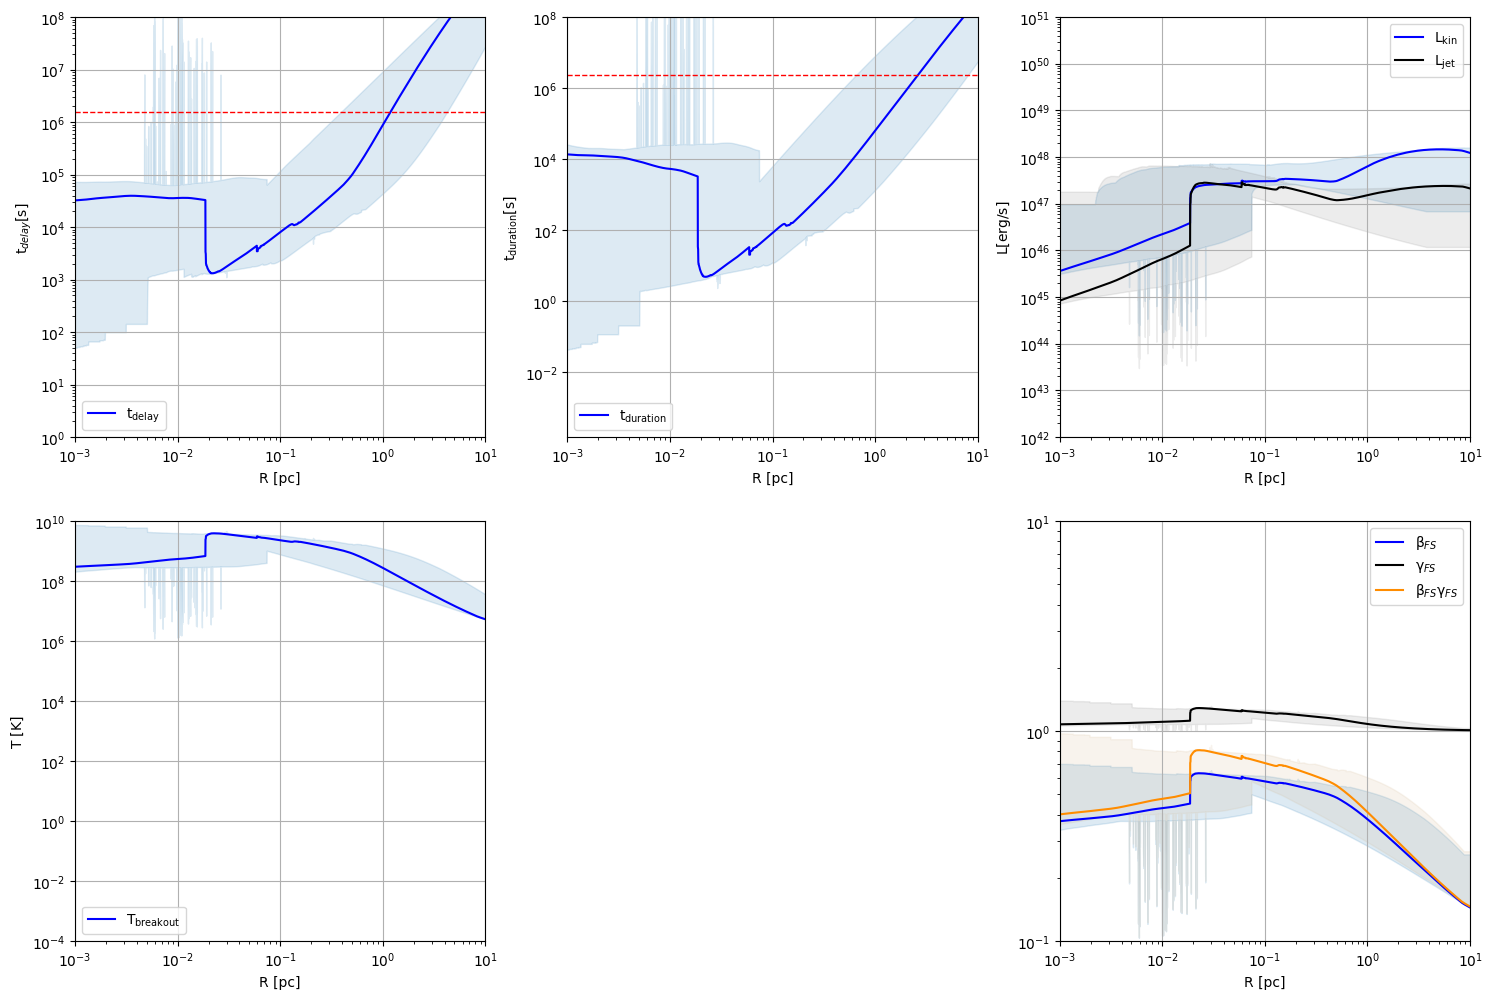

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

ax[0][0].plot(main_r/ct.pc, data_em_prop[438660].t_delay_vals*365*24*60*60, '-', color='blue', label=r"$\mathrm{t}_{\mathrm{delay}}$")
ax[0][0].fill_between(main_r/ct.pc, t_delay_min*365*24*60*60, t_delay_max*365*24*60*60, color=mpl.colors.to_rgba('tab:blue', 0.15))
ax[0][0].axhline(y=18*24*60*60, color='red', linestyle='--', lw=1.0)
ax[0][0].set_xscale('log')
ax[0][0].set_yscale('log')
ax[0][0].set_xlim([1e-3, 10])
ax[0][0].set_ylim([1, 1e8])
ax[0][0].grid(True)
ax[0][0].legend()
ax[0][0].set_xlabel(r"R [pc]", fontsize=10)
ax[0][0].set_ylabel(r"$\mathrm{t}_{delay} [\mathrm{s}]$", fontsize=10)

ax[0][1].plot(main_r/ct.pc, data_em_prop[438660].t_duration_vals*365*24*60*60, '-', color='blue', label=r"$\mathrm{t}_{\mathrm{duration}}$")
ax[0][1].fill_between(main_r/ct.pc, t_duration_min*365*24*60*60, t_duration_max*365*24*60*60, color=mpl.colors.to_rgba('tab:blue', 0.15))
ax[0][1].axhline(y=28*24*60*60, color='red', linestyle='--', lw=1.0)
ax[0][1].set_xscale('log')
ax[0][1].set_yscale('log')
ax[0][1].set_xlim([1e-3, 10])
ax[0][1].set_ylim([1.5e-4, 1e8])
ax[0][1].grid(True)
ax[0][1].legend()
ax[0][1].set_xlabel(r"R [pc]", fontsize=10)
ax[0][1].set_ylabel(r"$\mathrm{t}_{\mathrm{duration}} [\mathrm{s}]$", fontsize=10)


ax[0][2].plot(main_r/ct.pc, data_em_prop[438660].L_sh_vals, '-', color='blue', label=r"$\mathrm{L}_{\mathrm{kin}}$")
ax[0][2].fill_between(main_r/ct.pc, L_sh_min, L_sh_max, color=mpl.colors.to_rgba('tab:blue', 0.15))

ax[0][2].plot(main_r/ct.pc, data_em_prop[438660].L_j_vals, '-', color='black', label=r"$\mathrm{L}_{\mathrm{jet}}$")
ax[0][2].fill_between(main_r/ct.pc, L_j_min, L_j_max, color=mpl.colors.to_rgba('grey', 0.15))
ax[0][2].set_xscale('log')
ax[0][2].set_yscale('log')
ax[0][2].set_xlim([1e-3, 10])
ax[0][2].set_ylim([1e42, 1e51])
ax[0][2].grid(True)
ax[0][2].legend()
ax[0][2].set_xlabel(r"R [pc]", fontsize=10)
ax[0][2].set_ylabel(r"$\mathrm{L} [\mathrm{erg/s}]$", fontsize=10)

ax[1][1].axis('off')

ax[1][0].plot(main_r/ct.pc, data_em_prop[438660].T_breakout_vals, '-', color='blue', label=r"$\mathrm{T}_{\mathrm{breakout}}$")
ax[1][0].fill_between(main_r/ct.pc, T_breakout_min, T_breakout_max, color=mpl.colors.to_rgba('tab:blue', 0.15))
ax[1][0].set_xscale('log')
ax[1][0].set_yscale('log')
ax[1][0].set_xlim([1e-3, 10])
ax[1][0].set_ylim([1e-4, 1e10])
ax[1][0].grid(True)
ax[1][0].legend()
ax[1][0].set_xlabel(r"R [pc]", fontsize=10)
ax[1][0].set_ylabel(r"$\mathrm{T}~[\mathrm{K}]$", fontsize=10)


ax[1][2].plot(main_r/ct.pc, data_em_prop[438660].beta_vals, '-', color='blue', label=r"$\mathrm{\beta}_{FS}$")
ax[1][2].fill_between(main_r/ct.pc, beta_min, beta_max, color=mpl.colors.to_rgba('tab:blue', 0.15))

ax[1][2].plot(main_r/ct.pc, data_em_prop[438660].gamma_vals, '-', color='black', label=r"$\mathrm{\gamma}_{FS}$")
ax[1][2].fill_between(main_r/ct.pc, gamma_min, gamma_max, color=mpl.colors.to_rgba('grey', 0.15))

ax[1][2].plot(main_r/ct.pc, data_em_prop[438660].beta_gamma_vals, '-', color='darkorange', label=r"$\mathrm{\beta}_{FS} \mathrm{\gamma}_{FS}$")
ax[1][2].fill_between(main_r/ct.pc, beta_gamma_min, beta_gamma_max, color=mpl.colors.to_rgba('tan', 0.15))

ax[1][2].set_xscale('log')
ax[1][2].set_yscale('log')
ax[1][2].set_xlim([1e-3, 10])
ax[1][2].set_ylim([1e-1, 10])
ax[1][2].grid(True)
ax[1][2].legend()
ax[1][2].set_xlabel(r"R [pc]", fontsize=10)


plt.savefig("EM_cp_plots_min_max.jpg", format="jpg")
plt.show()

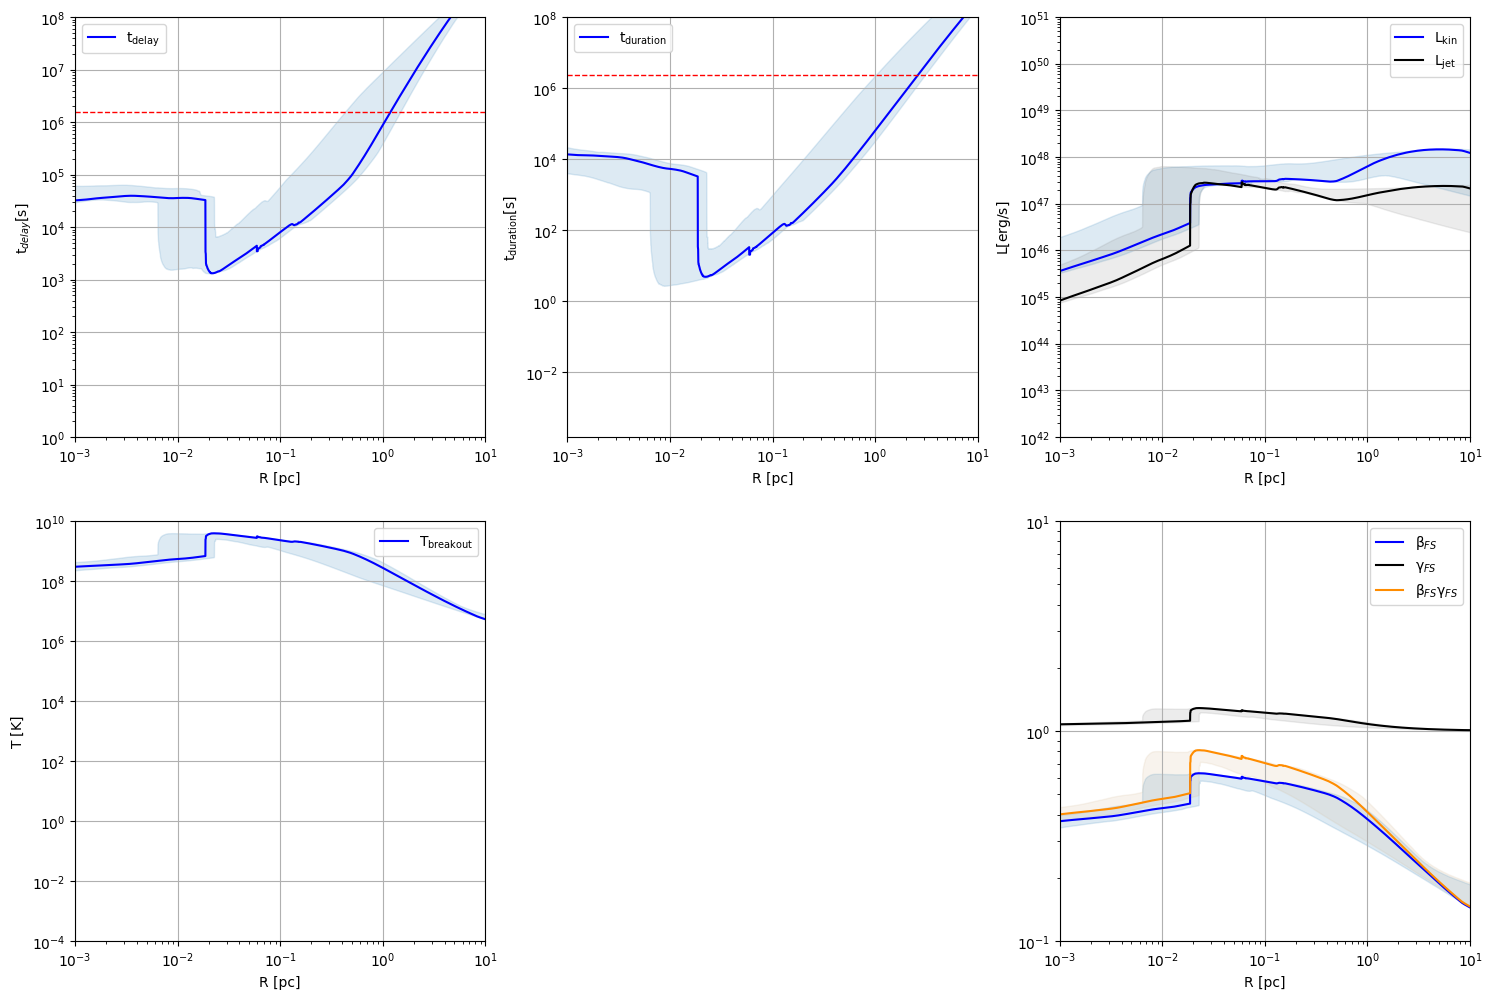

In [16]:
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

ax[0][0].plot(main_r/ct.pc, data_em_prop[438660].t_delay_vals*365*24*60*60, '-', color='blue', label=r"$\mathrm{t}_{\mathrm{delay}}$")
ax[0][0].fill_between(main_r/ct.pc, t_delay_lo*365*24*60*60, t_delay_hi*365*24*60*60, color=mpl.colors.to_rgba('tab:blue', 0.15))
ax[0][0].axhline(y=18*24*60*60, color='red', linestyle='--', lw=1.0)
ax[0][0].set_xscale('log')
ax[0][0].set_yscale('log')
ax[0][0].set_xlim([1e-3, 10])
ax[0][0].set_ylim([1, 1e8])
ax[0][0].grid(True)
ax[0][0].legend()
ax[0][0].set_xlabel(r"R [pc]", fontsize=10)
ax[0][0].set_ylabel(r"$\mathrm{t}_{delay} [\mathrm{s}]$", fontsize=10)

ax[0][1].plot(main_r/ct.pc, data_em_prop[438660].t_duration_vals*365*24*60*60, '-', color='blue', label=r"$\mathrm{t}_{\mathrm{duration}}$")
ax[0][1].fill_between(main_r/ct.pc, t_duration_lo*365*24*60*60, t_duration_hi*365*24*60*60, color=mpl.colors.to_rgba('tab:blue', 0.15))
ax[0][1].axhline(y=28*24*60*60, color='red', linestyle='--', lw=1.0)
ax[0][1].set_xscale('log')
ax[0][1].set_yscale('log')
ax[0][1].set_xlim([1e-3, 10])
ax[0][1].set_ylim([1.5e-4, 1e8])
ax[0][1].grid(True)
ax[0][1].legend()
ax[0][1].set_xlabel(r"R [pc]", fontsize=10)
ax[0][1].set_ylabel(r"$\mathrm{t}_{\mathrm{duration}} [\mathrm{s}]$", fontsize=10)


ax[0][2].plot(main_r/ct.pc, data_em_prop[438660].L_sh_vals, '-', color='blue', label=r"$\mathrm{L}_{\mathrm{kin}}$")
ax[0][2].fill_between(main_r/ct.pc, L_sh_lo, L_sh_hi, color=mpl.colors.to_rgba('tab:blue', 0.15))

ax[0][2].plot(main_r/ct.pc, data_em_prop[438660].L_j_vals, '-', color='black', label=r"$\mathrm{L}_{\mathrm{jet}}$")
ax[0][2].fill_between(main_r/ct.pc, L_j_lo, L_j_hi, color=mpl.colors.to_rgba('grey', 0.15))
ax[0][2].set_xscale('log')
ax[0][2].set_yscale('log')
ax[0][2].set_xlim([1e-3, 10])
ax[0][2].set_ylim([1e42, 1e51])
ax[0][2].grid(True)
ax[0][2].legend()
ax[0][2].set_xlabel(r"R [pc]", fontsize=10)
ax[0][2].set_ylabel(r"$\mathrm{L} [\mathrm{erg/s}]$", fontsize=10)

ax[1][1].axis('off')

ax[1][0].plot(main_r/ct.pc, data_em_prop[438660].T_breakout_vals, '-', color='blue', label=r"$\mathrm{T}_{\mathrm{breakout}}$")
ax[1][0].fill_between(main_r/ct.pc, T_breakout_lo, T_breakout_hi, color=mpl.colors.to_rgba('tab:blue', 0.15))
ax[1][0].set_xscale('log')
ax[1][0].set_yscale('log')
ax[1][0].set_xlim([1e-3, 10])
ax[1][0].set_ylim([1e-4, 1e10])
ax[1][0].grid(True)
ax[1][0].legend()
ax[1][0].set_xlabel(r"R [pc]", fontsize=10)
ax[1][0].set_ylabel(r"$\mathrm{T}~[\mathrm{K}]$", fontsize=10)


ax[1][2].plot(main_r/ct.pc, data_em_prop[438660].beta_vals, '-', color='blue', label=r"$\mathrm{\beta}_{FS}$")
ax[1][2].fill_between(main_r/ct.pc, beta_lo, beta_hi, color=mpl.colors.to_rgba('tab:blue', 0.15))

ax[1][2].plot(main_r/ct.pc, data_em_prop[438660].gamma_vals, '-', color='black', label=r"$\mathrm{\gamma}_{FS}$")
ax[1][2].fill_between(main_r/ct.pc, gamma_lo, gamma_hi, color=mpl.colors.to_rgba('grey', 0.15))

ax[1][2].plot(main_r/ct.pc, data_em_prop[438660].beta_gamma_vals, '-', color='darkorange', label=r"$\mathrm{\beta}_{FS} \mathrm{\gamma}_{FS}$")
ax[1][2].fill_between(main_r/ct.pc, beta_gamma_lo, beta_gamma_hi, color=mpl.colors.to_rgba('tan', 0.15))

ax[1][2].set_xscale('log')
ax[1][2].set_yscale('log')
ax[1][2].set_xlim([1e-3, 10])
ax[1][2].set_ylim([1e-1, 10])
ax[1][2].grid(True)
ax[1][2].legend()
ax[1][2].set_xlabel(r"R [pc]", fontsize=10)

plt.savefig("EM_cp_plots_lo_hi.jpg", format="jpg")
plt.show()